In [70]:
%matplotlib inline
import pandas as pd
import numpy as np

In [71]:
uber_trips_2014 = pd.read_csv("/Users/zhangyifei/Desktop/Datathon/dataset/uber_trips_2014.csv")

In [177]:
ut14 = uber_trips_2014.sample(frac=0.01)

In [205]:
u15 = pd.read_csv('/Users/zhangyifei/Desktop/Datathon/uber_2015_with_latlong_sampled_0.01.csv')

In [207]:
u15 = u15[['pickup_datetime', 'pickup_latitude', 'pickup_longitude']]

In [269]:
yc14q2 = pd.read_csv('yellow_trips_2014Q2_sampled_001.csv')
yc14q3 = pd.read_csv('yellow_trips_2014Q3_sampled_001.csv')
yc15q1 = pd.read_csv('yellow_trips_2015Q1_sampled_001.csv')
yc15q2 = pd.read_csv('yellow_trips_2015Q2_sampled_001.csv')

In [271]:
yc14q2 = yc14q2[['pickup_datetime', 'pickup_longitude', 'pickup_latitude']]
yc14q3 = yc14q3[['pickup_datetime', 'pickup_longitude', 'pickup_latitude']]
yc15q1 = yc15q1[['pickup_datetime', 'pickup_longitude', 'pickup_latitude']]
yc15q2 = yc15q2[['pickup_datetime', 'pickup_longitude', 'pickup_latitude']]

In [273]:
yc = yc14q2
yc = yc.append(yc14q3)
yc = yc.append(yc15q1)
yc = yc.append(yc15q2)

In [274]:
yc['isuber'] = 0
yc['Service'] = 'G'

In [209]:
#the unique base company
ut14['pickup_datetime'] = pd.to_datetime(ut14['pickup_datetime'])
u15['pickup_datetime'] = pd.to_datetime(u15['pickup_datetime'])

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [179]:
ut14['Service'] = 'U'
del ut14['base']

In [210]:
u15['Service'] = 'U'

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [211]:
ut14['isuber'] = 1
u15['isuber'] = 1

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [76]:
gt_csv = pd.read_csv("/Users/zhangyifei/Desktop/Datathon/dataset/green_trips.csv")

In [181]:
gt = gt_csv.sample(frac=0.01)

In [182]:
gt['Service'] = 'G'
gt['isuber'] = 0

In [183]:
gt['pickup_datetime'] = pd.to_datetime(gt['pickup_datetime'])

In [184]:
gt = gt[['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'Service', 'isuber']]

In [277]:
dataset = pd.DataFrame()

In [278]:
dataset = dataset.append(ut14)
dataset = dataset.append(gt)
dataset = dataset.append(yc)

In [279]:
dataset = dataset.append(u15)

In [281]:
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])

In [282]:
dataset['date'] = dataset['pickup_datetime'].dt.date

In [283]:
weather = pd.read_csv("/Users/zhangyifei/Desktop/Datathon/dataset/weather.csv")

In [284]:
weather['date'] = pd.to_datetime(weather['date']).dt.date

In [285]:
weather = weather.groupby('date').first()

In [286]:
weather = weather.reset_index()


In [287]:
dataset = pd.merge(dataset, weather, left_on='date', right_on='date')

In [288]:
dataset['month'] = dataset['pickup_datetime'].dt.month

In [289]:
dataset['year'] = dataset['pickup_datetime'].dt.year

In [290]:
dataset['hour'] = dataset['pickup_datetime'].dt.hour

In [291]:
dataset['month'] = dataset['month'] + (dataset['pickup_datetime'].dt.year - 2014)*12

Ignoring public holidays for now

In [292]:
dataset['DayOfWeek'] = dataset['pickup_datetime'].dt.dayofweek

In [66]:
import seaborn as sns

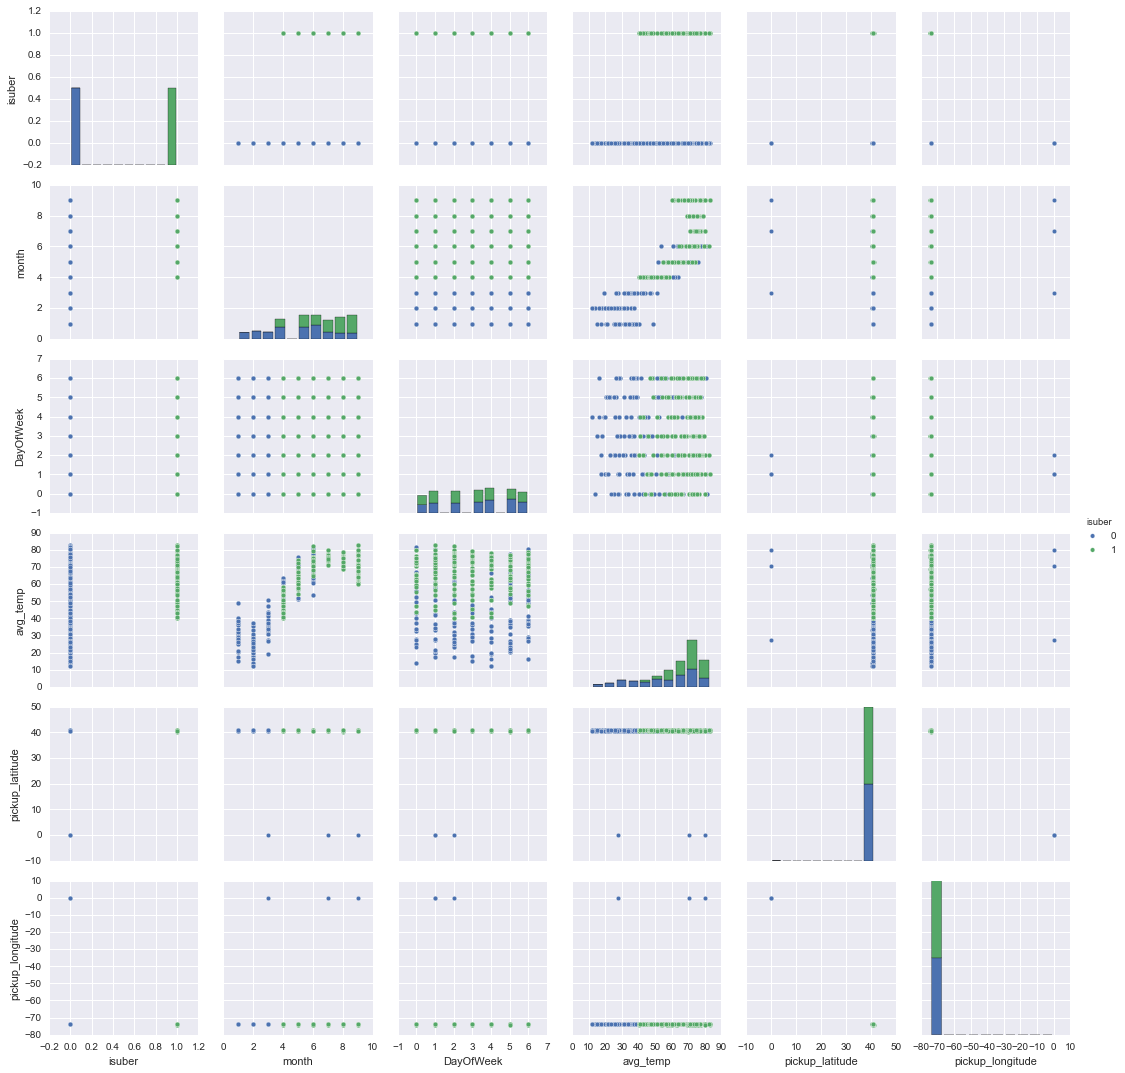

In [69]:
sns.pairplot(dataset[['isuber', 'month', 'DayOfWeek', 'avg_temp', 'pickup_latitude', 'pickup_longitude']], hue='isuber')

Seems like there are outliers for pickup location (0 values). Need to analyze them.

In [293]:
ds = dataset

In [294]:
ds = ds[ds['pickup_latitude'] != 0]
ds = ds[ds['pickup_longitude'] != 0]

In [237]:
ds = ds[ds['pickup_latitude'] > 38]

In [295]:
ds

,Service,isuber,pickup_datetime,pickup_latitude,pickup_longitude,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,month,year,hour,DayOfWeek
0,U,1,2014-09-27 02:42:00,40.719100,-73.963100,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,2,5
1,U,1,2014-09-27 19:09:00,40.743300,-73.957800,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,19,5
2,U,1,2014-09-27 00:37:00,40.757600,-73.978300,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,0,5
3,U,1,2014-09-27 20:26:00,40.736700,-73.981600,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,20,5
4,U,1,2014-09-27 19:12:00,40.762000,-73.975800,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,19,5
5,U,1,2014-09-27 15:52:00,40.723600,-74.010700,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,15,5
6,U,1,2014-09-27 17:15:00,40.734400,-73.988300,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,17,5
7,U,1,2014-09-27 10:26:00,40.782700,-73.974900,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,10,5
8,U,1,2014-09-27 17:32:00,40.812900,-73.945700,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,17,5
9,U,1,2014-09-27 15:39:00,40.723900,-74.009400,2014-09-27,84,62,73.0,0,0,0,JFK,40.64749,-73.779982,9,2014,15,5


In [296]:
ds.to_csv('full_0.01.csv')

In [317]:
dsc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748055 entries, 0 to 1961668
Data columns (total 19 columns):
Service             object
isuber              int64
pickup_datetime     datetime64[ns]
pickup_latitude     float64
pickup_longitude    float64
date                object
max_temp            int64
min_temp            int64
avg_temp            float64
precipitation       object
snowfall            object
snow_depth          object
location            object
latitude            float64
longitude           float64
month               int64
year                int64
hour                int64
DayOfWeek           int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(6)
memory usage: 266.7+ MB


In [ ]:
sns.pairplot(dsc[['isuber', 'month', 'DayOfWeek', 'hour', 'avg_temp', 'max_temp', 'min_temp', 'snow_depth', 'precipitation', 'pickup_latitude', 'pickup_longitude']].sample(frac=0.05), hue='isuber')

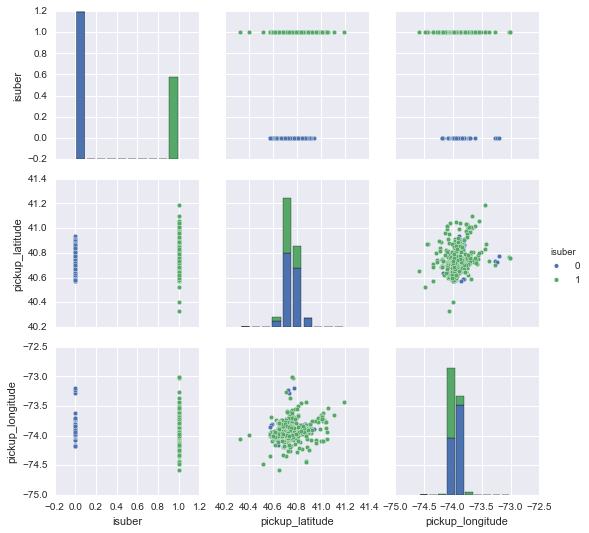

In [172]:
sns.pairplot(ds[['isuber', 'pickup_latitude', 'pickup_longitude']][ds['year']==2014], hue='isuber')

In [297]:
dsc = ds[ds['pickup_latitude'] > 40.65][ds['pickup_latitude'] < 40.9]
dsc = dsc[dsc['pickup_longitude'] < -73.8][dsc['pickup_longitude'] > -74.02]

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


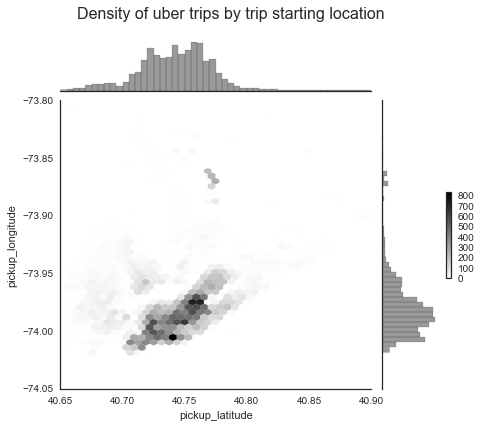

In [315]:
import matplotlib.pyplot as plt
with sns.axes_style("white"):
    hexplot = sns.jointplot(x=dsc[dsc['isuber']==1]['pickup_latitude'], 
                  y=dsc[dsc['isuber']==1]['pickup_longitude'], 
                  kind="hex", color="k", gridsize=[40,25], stat_func=None);
    cax = hexplot.fig.add_axes([1, .35, .01, .2]) # size and placement of bar
    plt.colorbar(cax=cax)
    sns.plt.suptitle('Density of uber trips by trip starting location', size=16)
    sns.plt.subplots_adjust(top=.9)

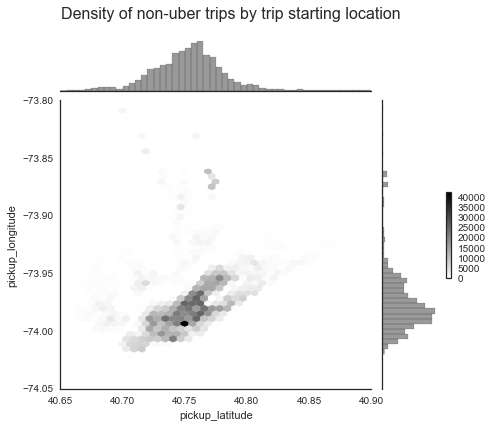

In [316]:
with sns.axes_style("white"):
    hexplot = sns.jointplot(x=dsc[dsc['isuber']==0]['pickup_latitude'], 
                  y=dsc[dsc['isuber']==0]['pickup_longitude'], 
                  kind="hex", color="k", gridsize=[40,25], stat_func=None);
    cax = hexplot.fig.add_axes([1, .35, .01, .2]) # size and placement of bar
    plt.colorbar(cax=cax)
    sns.plt.suptitle('Density of non-uber trips by trip starting location', size=16)
    sns.plt.subplots_adjust(top=.9)